In [43]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()

for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']
    
#mydata.info()
mydata.iloc[0]

PG      8.114557
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

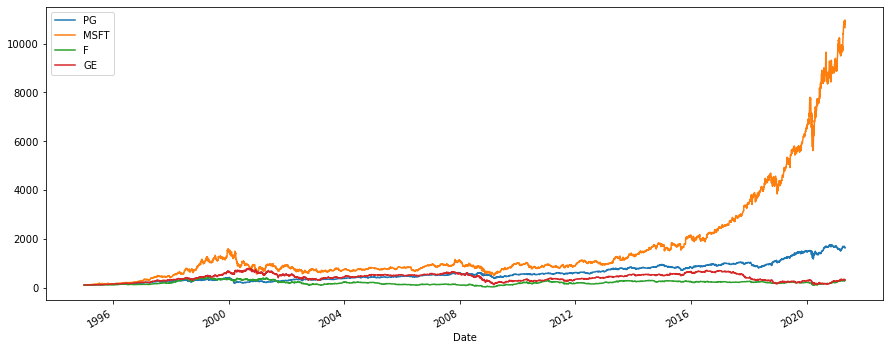

In [44]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [49]:
returns = ((mydata / mydata.shift(1)) - 1)
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [55]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.130541
MSFT    0.225901
F       0.118919
GE      0.095469
dtype: float64

In [51]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
np.dot(annual_returns, weights)

0.1427074525699282

In [52]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

14.271 %
